In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [2]:
file_github = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master\
/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
data = []
with requests.Session() as s:
    download = s.get(file_github)

    decoded_content = download.content.decode()

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        if row[2]=='Korea':
            print(row)
        data.append(row)

In [4]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.drop(columns=['Lat', 'Long'])

In [5]:
column_dates = df.columns[2:]

In [6]:
df[column_dates] = df[column_dates].replace('', np.NaN)

In [7]:
dict_types = {}
for idx, col in enumerate(df.columns[:]):
    if idx>1:
        col_type = np.float64
    else:
        col_type = 'object'
    dict_types[col] = col_type
df = df.iloc[:,:].astype(dict_types)

In [8]:
def getting_max(x):
    print(x)
    
def new_name(x):
    if x['Province/State'] =='' or x['Province/State']==x['Country/Region']:
        name = x['Country/Region']
    else:
        name = x['Country/Region'] + '-' + x['Province/State']
    return name

In [9]:
df['Name'] = df.apply(new_name, axis=1)

In [10]:
df = df.reset_index(drop=True)
df = df.drop(columns=['Province/State', 'Country/Region'])
df = df.set_index('Name')
df = df.sort_values(by=df.columns[-1], ascending=False)
df.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,10.0,12.0,17.0,21.0,29.0,34.0,52.0,79.0,107.0,148.0,197.0,233.0,366.0,463.0,631.0,827.0,827.0,1266.0,1441.0,1809.0,2158.0,2503.0,2978.0,3405.0,4032.0,4825.0,5476.0,6077.0,6820.0,7503.0,8215.0,9134.0,10023.0,10779.0,11591.0,12428.0,13155.0,13915.0,14681.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,10.0,17.0,28.0,35.0,54.0,55.0,133.0,195.0,289.0,342.0,533.0,623.0,830.0,1043.0,1375.0,1772.0,2311.0,2808.0,3647.0,4365.0,5138.0,5982.0,6803.0,7716.0,8464.0,9387.0,10348.0,11198.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,7.0,11.0,12.0,14.0,17.0,21.0,22.0,28.0,36.0,40.0,47.0,54.0,63.0,85.0,108.0,118.0,200.0,244.0,307.0,417.0,557.0,706.0,942.0,1209.0,1581.0,2026.0,2467.0,2978.0,3873.0,4757.0,5926.0,7087.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,6.0,9.0,11.0,19.0,19.0,33.0,48.0,48.0,79.0,91.0,91.0,148.0,148.0,148.0,243.0,450.0,562.0,674.0,860.0,1100.0,1331.0,1696.0,1995.0,2314.0,2606.0,3024.0,3523.0,4032.0,5387.0,6507.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,4.0,6.0,8.0,8.0,8.0,21.0,21.0,55.0,55.0,71.0,137.0,177.0,233.0,281.0,335.0,422.0,465.0,578.0,759.0,1019.0,1228.0,1408.0,1789.0,2352.0,2921.0,3605.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,5.0,8.0,12.0,16.0,19.0,26.0,34.0,43.0,54.0,66.0,77.0,92.0,107.0,124.0,145.0,194.0,237.0,291.0,354.0,429.0,514.0,611.0,724.0,853.0,988.0,1135.0,1284.0,1433.0,1556.0,1685.0,1812.0,1934.0,2077.0,2234.0,2378.0,2517.0,2640.0,2757.0,2898.0,3036.0,3160.0,3294.0
China-Hubei,17.0,17.0,24.0,40.0,52.0,76.0,125.0,125.0,162.0,204.0,249.0,350.0,414.0,479.0,549.0,618.0,699.0,780.0,871.0,974.0,1068.0,1068.0,1310.0,1457.0,1596.0,1696.0,1789.0,1921.0,2029.0,2144.0,2144.0,2346.0,2346.0,2495.0,2563.0,2615.0,2641.0,2682.0,2727.0,2761.0,2803.0,2835.0,2871.0,2902.0,2931.0,2959.0,2986.0,3008.0,3024.0,3046.0,3056.0,3062.0,3075.0,3085.0,3099.0,3111.0,3122.0,3130.0,3133.0,3139.0,3153.0,3153.0,3160.0,3163.0,3169.0,3174.0,3177.0,3182.0,3186.0,3187.0,3193.0,3199.0,3203.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,4.0,5.0,5.0,10.0,12.0,20.0,24.0,43.0,58.0,76.0,106.0,136.0,179.0,213.0,276.0,356.0,434.0,546.0,639.0,771.0,864.0,1039.0,1173.0,1339.0,1487.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,7.0,9.0,11.0,17.0,24.0,28.0,44.0,67.0,84.0,94.0,123.0,157.0,206.0,267.0,342.0,433.0,533.0,645.0,7

In [11]:
df.index.tolist()

['Italy',
 'Spain',
 'US',
 'France',
 'United Kingdom',
 'Iran',
 'China-Hubei',
 'Netherlands',
 'Germany',
 'Belgium',
 'Switzerland',
 'Turkey',
 'Brazil',
 'Sweden',
 'Portugal',
 'Indonesia',
 'Korea, South',
 'Austria',
 'Ecuador',
 'Denmark',
 'Philippines',
 'Romania',
 'Ireland',
 'Algeria',
 'India',
 'Poland',
 'Dominican Republic',
 'Canada-Ontario',
 'Egypt',
 'Japan',
 'Greece',
 'Canada-Quebec',
 'Peru',
 'Norway',
 'Iraq',
 'Malaysia',
 'Czechia',
 'Mexico',
 'Morocco',
 'Pakistan',
 'Israel',
 'Argentina',
 'Serbia',
 'Panama',
 'Russia',
 'Canada-British Columbia',
 'Luxembourg',
 'San Marino',
 'Ukraine',
 'Hungary',
 'Colombia',
 'Saudi Arabia',
 'Chile',
 'China-Henan',
 'Slovenia',
 'Finland',
 'Thailand',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Lebanon',
 'Albania',
 'Burkina Faso',
 'Andorra',
 'Honduras',
 'Bulgaria',
 'China-Heilongjiang',
 'Congo (Kinshasa)',
 'Canada-Alberta',
 'North Macedonia',
 'Estonia',
 'Australia-New South Wales',
 'Diamond Princess

In [12]:
names_to_plot = ['Colombia', 'Italy', 'Argentina', 'Peru', 'Chile', 'Mexico', 'Dominican Republic']

In [13]:
for per_name in df.index.tolist()[:10]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [14]:
names_to_plot

['Colombia',
 'Italy',
 'Argentina',
 'Peru',
 'Chile',
 'Mexico',
 'Dominican Republic',
 'Spain',
 'US',
 'France',
 'United Kingdom',
 'Iran',
 'China-Hubei',
 'Netherlands',
 'Germany',
 'Belgium']

In [15]:
personal_names = ['Japan', 'Singapore', 'China-Hong Kong', 'US', 'Norway', 'Sweden',
                   'Panama', 'Colombia', 'Peru', 'Chile', 'Argentina', 'Ecuador',  'Russia',
                  'Mexico', 'Brazil', 'Uruguay']

In [16]:
for per_name in personal_names:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

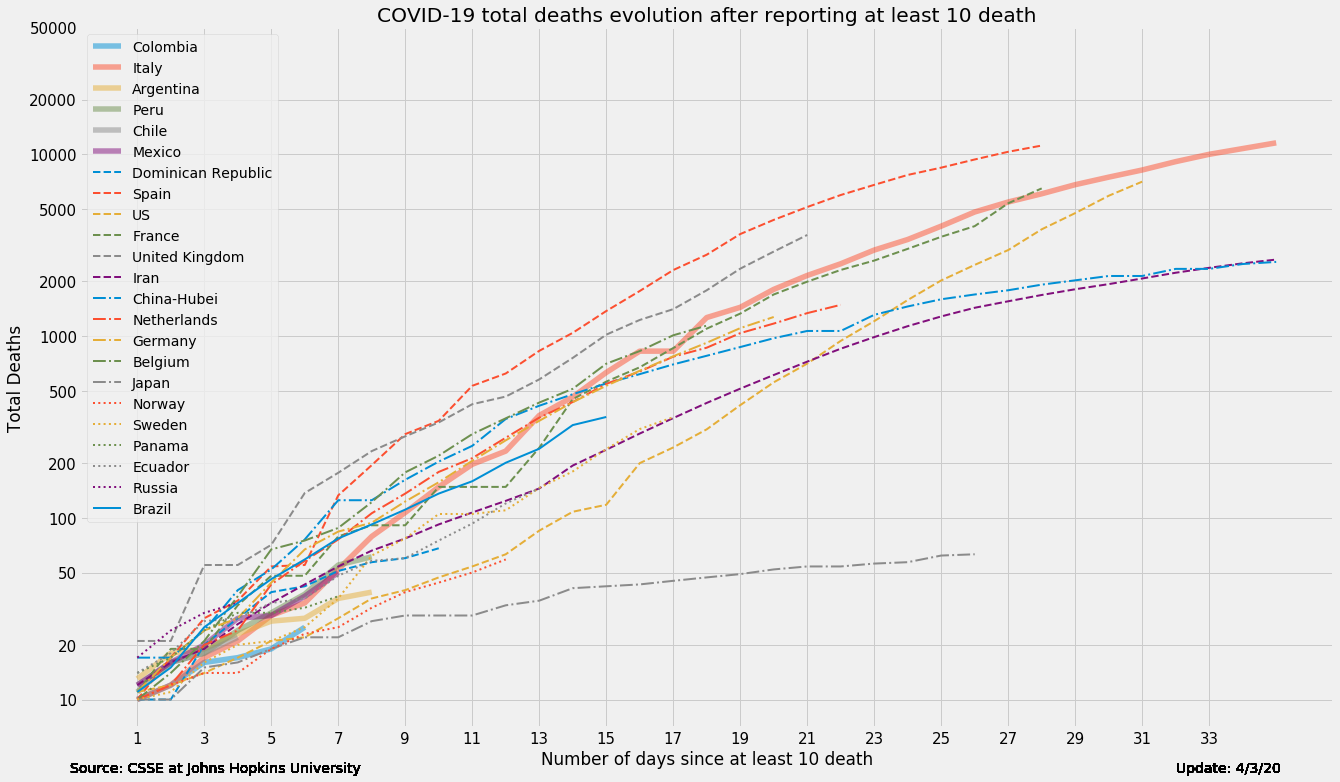

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 10
high_cases = 70000
max_periods = 35
ls = 0
count = 0
for name in names_to_plot:
    row = df.loc[name, :]
    if name in names_to_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            c_i = colors[count]
            ls_i = LINE_STYLES[ls]
            current_data = row[(row>=low_cases) & (row<=high_cases)]
            if len(current_data)>0:
                values_to_plot = current_data.values[:max_periods]
                if name in ['Colombia', 'Italy', 'Argentina', 'Peru', 'Chile', 'Mexico']:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.5)
                else:
                    ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14)
    ax.set_yscale('log')
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([10**i*j*low_cases for j in [1,2,5] for i in np.arange(0, 4, 1.0)])
    ax.set_xticks(range(1, max_periods,2))
    ax.set_xlabel(f'Number of days since at least {low_cases} death')
    ax.set_ylabel("Total Deaths")
    ax.set_title(f"COVID-19 total deaths evolution after reporting at least {low_cases} death")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.text(max_periods-3, low_cases*0.4, f'Update: {df.columns[-1]}')
    ax.text(-1,low_cases*0.4, 'Source: CSSE at Johns Hopkins University')
plt.show()